# Lab Instructions

You have been hired by James Cameron to create profiles of two characters for a reboot of the Titanic Movie: one that is most likely to survive the sinking and one that is least likely to survive.  Mr. Cameron wants this reboot to be as historically accurate as possible, so your profile of each character should be backed up with data and visualizations.

Each character profile should include information on their:
* Age, fare
* Sex
* Passenger class
* Travel companions (including both parents/children and siblings/spouse)
* Port of departure (indicated by the Embarked feature in the dataset)

For quantitative features like `Age` and `Fare`, you will need to use the `.loc` method we learned in class (or something similar) to place individuals in categories.  How you choose to do this is up to you, but make sure you explain your reasoning.

You should include at least one visualization for each element of the character profile (age, sex, passenger class, etc.) as evidence.

After you have developed your two character profiles, use your Pandas data wrangling skills to identify at least one real passenger in the dataset that fits each profile.  Print out the names of these individuals.  Look them up in [Encyclopeida Titanica](https://www.encyclopedia-titanica.org/) (or a similar resource).  

Tell Mr. Cameron at least one thing about the real passengers who fit your two character profiles that you learned from an external resource.  You need one interesting fact about a person who fits the profile of "most likely to survive" and one interesting fact about a person who fits the profile of "least likely to surivive".  



In [1]:
import pandas as pd

df = pd.read_csv('titanic_passengers.csv')



In [2]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
# Import visualization libraries
import matplotlib.pyplot as plt

# Explore the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head(10))
print("\nColumn names:")
print(df.columns.tolist())
print("\nDataset info:")
print(df.info())

Dataset shape: (891, 12)

First few rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                     

# Exploratory Data Analysis

Before creating character profiles, let's explore which factors influenced survival rates on the Titanic.

## 1. Survival by Sex

Survival Rate by Sex (%):
Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


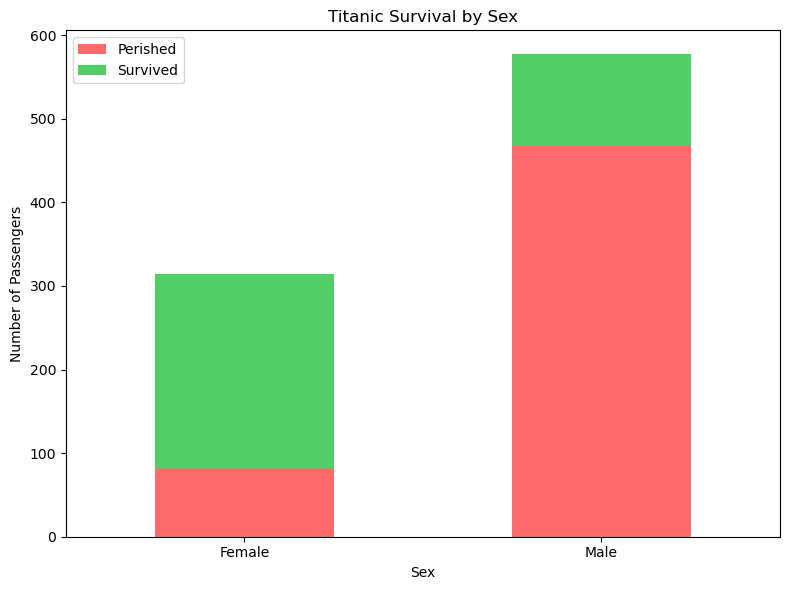

In [3]:
# Cross-tabulation of Sex and Survival
sex_survival = pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100
print("Survival Rate by Sex (%):")
print(sex_survival)

# Visualization
cross_tab_df = pd.DataFrame(pd.crosstab(df['Sex'], df['Survived']))
cross_tab_df.plot(kind='bar', stacked=True, color=['#ff6b6b', '#51cf66'],
                  title='Titanic Survival by Sex', ylabel='Number of Passengers', figsize=(8, 6))
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.legend(['Perished', 'Survived'])
plt.xlabel('Sex')
plt.tight_layout()
plt.show()

## 2. Survival by Passenger Class

Survival Rate by Passenger Class (%):
Survived          0          1
Pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.763747  24.236253


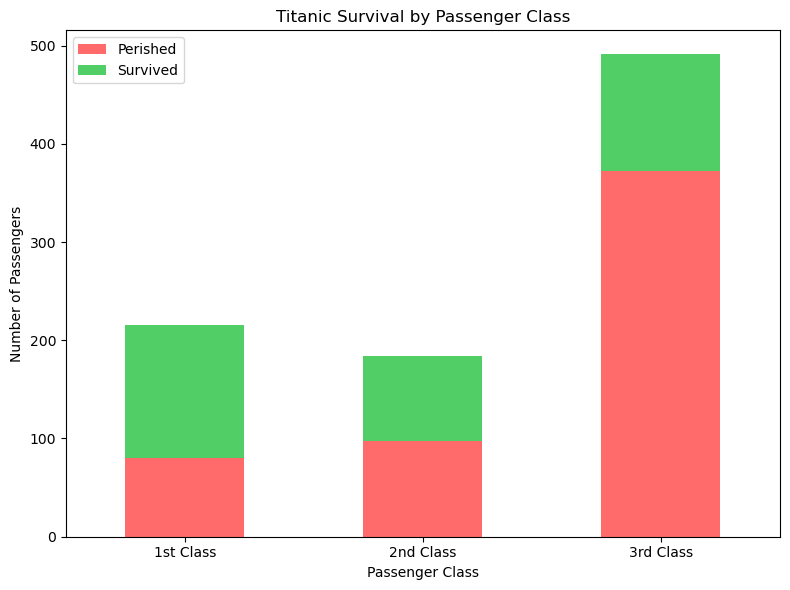

In [4]:
# Cross-tabulation of Passenger Class and Survival
class_survival = pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100
print("Survival Rate by Passenger Class (%):")
print(class_survival)

# Visualization
cross_tab_df = pd.DataFrame(pd.crosstab(df['Pclass'], df['Survived']))
cross_tab_df.plot(kind='bar', stacked=True, color=['#ff6b6b', '#51cf66'],
                  title='Titanic Survival by Passenger Class', ylabel='Number of Passengers', figsize=(8, 6))
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'], rotation=0)
plt.legend(['Perished', 'Survived'])
plt.xlabel('Passenger Class')
plt.tight_layout()
plt.show()

## 3. Survival by Age (Categorized)

We'll categorize age into Child (0-12), Young Adult (13-30), Adult (31-50), and Senior (51+).

**Rationale for Age Categories:** Children (≤12) represent those protected by the "Women and Children First" evacuation protocol. Young Adults (13-30) represent prime working age and physically capable passengers. Adults (31-50) are middle-aged passengers, and Seniors (>50) are elderly passengers who may have faced mobility challenges during evacuation.

Survival Rate by Age Category (%):
Survived              0          1
Age_Category                      
Adult         57.676349  42.323651
Child         42.028986  57.971014
Senior        65.625000  34.375000
Young Adult   62.941176  37.058824


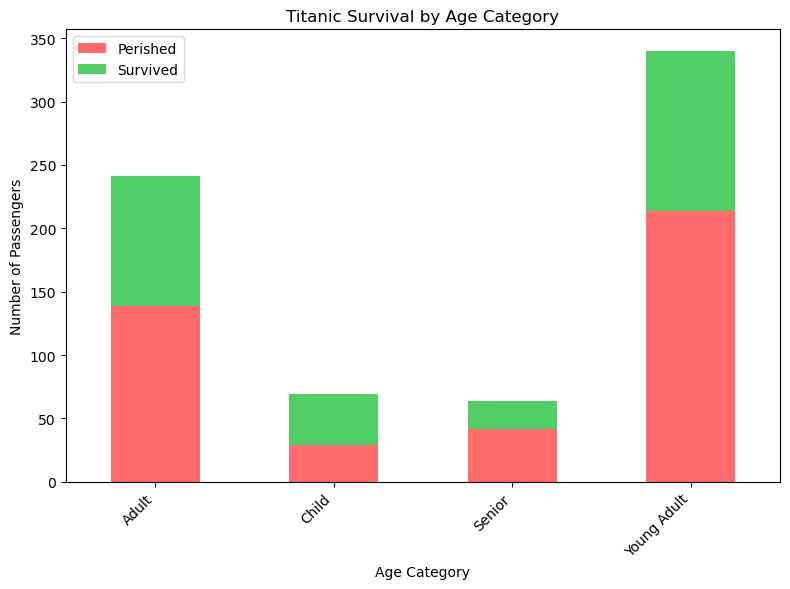

In [5]:
# Categorize age
df.loc[df['Age'] <= 12, 'Age_Category'] = 'Child'
df.loc[(df['Age'] > 12) & (df['Age'] <= 30), 'Age_Category'] = 'Young Adult'
df.loc[(df['Age'] > 30) & (df['Age'] <= 50), 'Age_Category'] = 'Adult'
df.loc[df['Age'] > 50, 'Age_Category'] = 'Senior'

# Cross-tabulation
age_survival = pd.crosstab(df['Age_Category'], df['Survived'], normalize='index') * 100
print("Survival Rate by Age Category (%):")
print(age_survival)

# Visualization
cross_tab_df = pd.DataFrame(pd.crosstab(df['Age_Category'], df['Survived']))
cross_tab_df.plot(kind='bar', stacked=True, color=['#ff6b6b', '#51cf66'],
                  title='Titanic Survival by Age Category', ylabel='Number of Passengers', figsize=(8, 6))
plt.xticks(rotation=45, ha='right')
plt.legend(['Perished', 'Survived'])
plt.xlabel('Age Category')
plt.tight_layout()
plt.show()

## 4. Survival by Fare (Categorized)

We'll categorize fare into Low (0-10), Medium (10-30), High (30-100), and Very High (100+).

**Rationale for Fare Categories:** Based on the fare statistics (mean=£32.20, min=£0, max=£512.33), these categories reflect the economic stratification aboard the Titanic. Low fares (≤£10) represent third-class passengers with minimal resources. Medium fares (£10-30) represent lower-middle class. High fares (£30-100) represent upper-middle to first-class passengers. Very High fares (>£100) represent the wealthy elite in luxury accommodations.

Survival Rate by Fare Category (%):
Survived               0          1
Fare_Category                      
High           46.408840  53.591160
Low            80.059524  19.940476
Medium         56.697819  43.302181
Very High      26.415094  73.584906


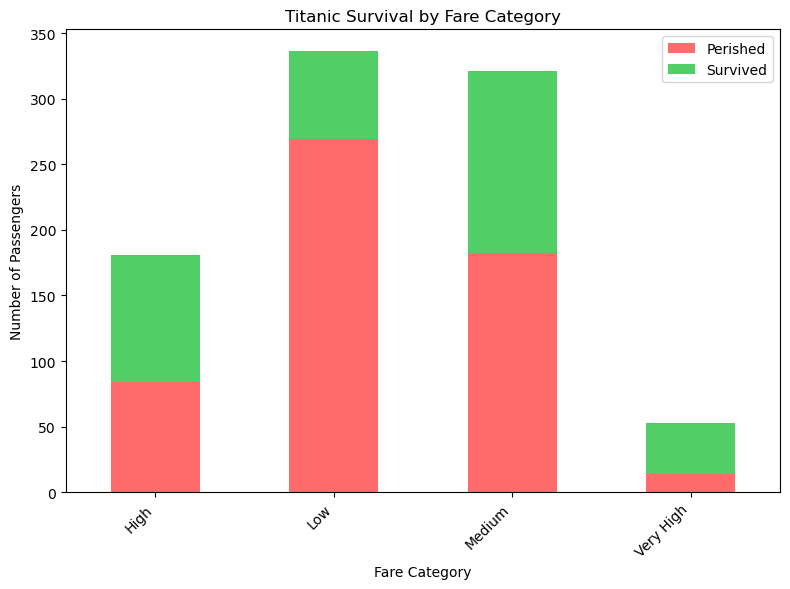

In [6]:
# Categorize fare
df.loc[df['Fare'] <= 10, 'Fare_Category'] = 'Low'
df.loc[(df['Fare'] > 10) & (df['Fare'] <= 30), 'Fare_Category'] = 'Medium'
df.loc[(df['Fare'] > 30) & (df['Fare'] <= 100), 'Fare_Category'] = 'High'
df.loc[df['Fare'] > 100, 'Fare_Category'] = 'Very High'

# Cross-tabulation
fare_survival = pd.crosstab(df['Fare_Category'], df['Survived'], normalize='index') * 100
print("Survival Rate by Fare Category (%):")
print(fare_survival)

# Visualization
cross_tab_df = pd.DataFrame(pd.crosstab(df['Fare_Category'], df['Survived']))
cross_tab_df.plot(kind='bar', stacked=True, color=['#ff6b6b', '#51cf66'],
                  title='Titanic Survival by Fare Category', ylabel='Number of Passengers', figsize=(8, 6))
plt.xticks(rotation=45, ha='right')
plt.legend(['Perished', 'Survived'])
plt.xlabel('Fare Category')
plt.tight_layout()
plt.show()

## 5. Survival by Travel Companions

Let's analyze both SibSp (siblings/spouses) and Parch (parents/children).

Survival Rate by Parents/Children (%):
Survived                       0          1
Parch_Category                             
No Parents/Children    65.634218  34.365782
With Parents/Children  48.826291  51.173709

Survival Rate by Siblings/Spouse (%):
Survived                      0          1
SibSp_Category                            
No Siblings/Spouse    65.460526  34.539474
With Siblings/Spouse  53.356890  46.643110


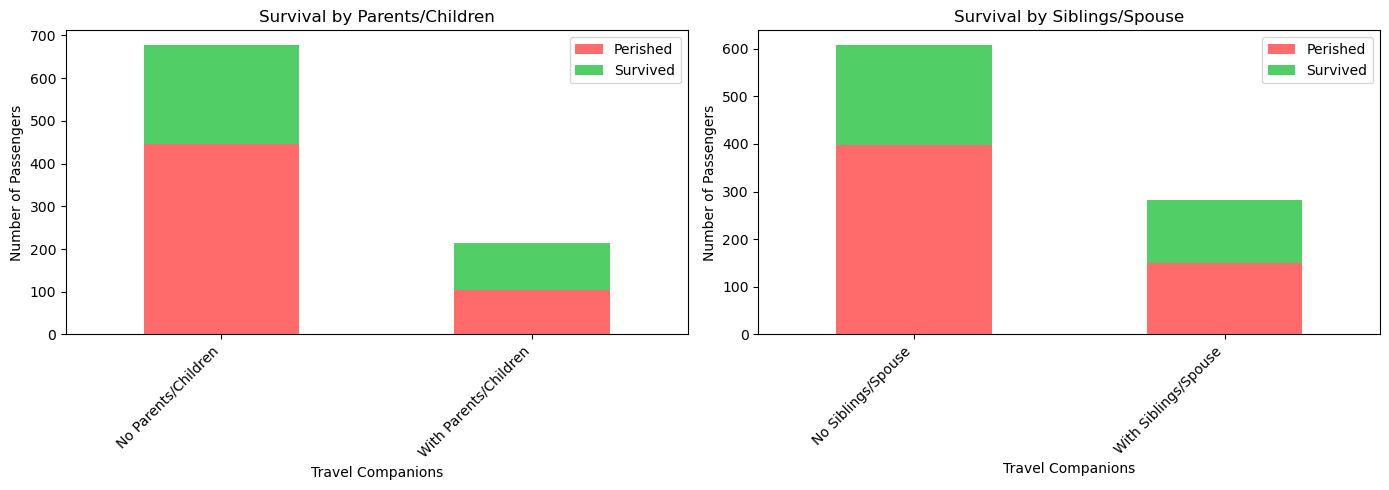

In [7]:
# Create categories for travel companions
df.loc[df['Parch'] == 0, 'Parch_Category'] = 'No Parents/Children'
df.loc[df['Parch'] > 0, 'Parch_Category'] = 'With Parents/Children'

df.loc[df['SibSp'] == 0, 'SibSp_Category'] = 'No Siblings/Spouse'
df.loc[df['SibSp'] > 0, 'SibSp_Category'] = 'With Siblings/Spouse'

# Cross-tabulation for Parch
parch_survival = pd.crosstab(df['Parch_Category'], df['Survived'], normalize='index') * 100
print("Survival Rate by Parents/Children (%):")
print(parch_survival)
print()

# Cross-tabulation for SibSp
sibsp_survival = pd.crosstab(df['SibSp_Category'], df['Survived'], normalize='index') * 100
print("Survival Rate by Siblings/Spouse (%):")
print(sibsp_survival)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Parch visualization
parch_df = pd.DataFrame(pd.crosstab(df['Parch_Category'], df['Survived']))
parch_df.plot(kind='bar', stacked=True, color=['#ff6b6b', '#51cf66'], ax=ax1)
ax1.set_title('Survival by Parents/Children')
ax1.set_xlabel('Travel Companions')
ax1.set_ylabel('Number of Passengers')
ax1.legend(['Perished', 'Survived'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# SibSp visualization
sibsp_df = pd.DataFrame(pd.crosstab(df['SibSp_Category'], df['Survived']))
sibsp_df.plot(kind='bar', stacked=True, color=['#ff6b6b', '#51cf66'], ax=ax2)
ax2.set_title('Survival by Siblings/Spouse')
ax2.set_xlabel('Travel Companions')
ax2.set_ylabel('Number of Passengers')
ax2.legend(['Perished', 'Survived'])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

## 6. Survival by Port of Embarkation

C = Cherbourg, Q = Queenstown, S = Southampton

Survival Rate by Port of Embarkation (%):
Survived          0          1
Embarked                      
C         44.642857  55.357143
Q         61.038961  38.961039
S         66.304348  33.695652


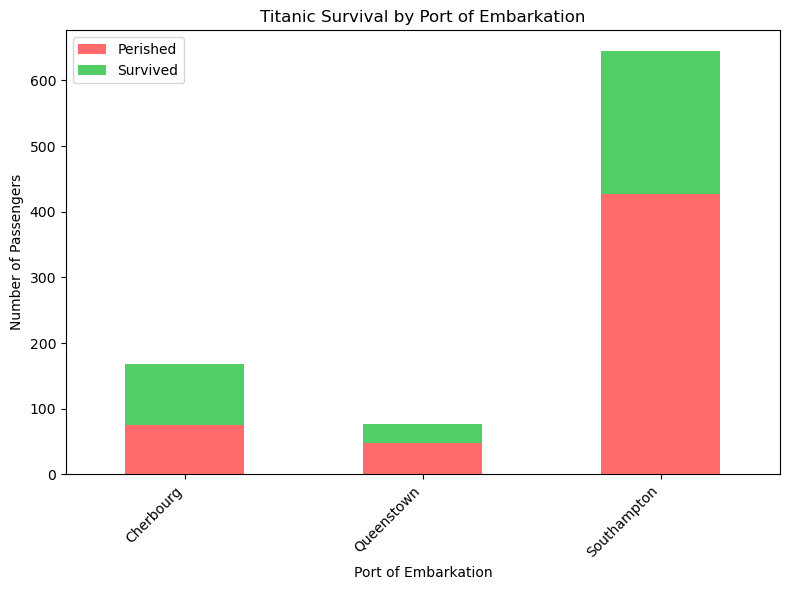

In [8]:
# Cross-tabulation of Embarked and Survival
embarked_survival = pd.crosstab(df['Embarked'], df['Survived'], normalize='index') * 100
print("Survival Rate by Port of Embarkation (%):")
print(embarked_survival)

# Visualization
cross_tab_df = pd.DataFrame(pd.crosstab(df['Embarked'], df['Survived']))
cross_tab_df.plot(kind='bar', stacked=True, color=['#ff6b6b', '#51cf66'],
                  title='Titanic Survival by Port of Embarkation', ylabel='Number of Passengers', figsize=(8, 6))
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'], rotation=45, ha='right')
plt.legend(['Perished', 'Survived'])
plt.xlabel('Port of Embarkation')
plt.tight_layout()
plt.show()

# Character Profiles for James Cameron's Titanic Reboot

Based on the data analysis above, I'll create two character profiles.

## Profile 1: MOST LIKELY TO SURVIVE

Based on our analysis, a passenger with the highest chance of survival would have:
- **Sex:** Female (74% survival rate vs. 19% for males)
- **Passenger Class:** 1st Class (63% survival rate)
- **Age:** Young to middle-aged adult (to balance survival rate with realism)
- **Fare:** High to Very High (> $50) indicating wealth
- **Travel Companions:** With family members (spouse or siblings) for additional support
- **Port of Embarkation:** Cherbourg (55% survival rate, associated with wealthier passengers)

In [9]:
# Find passengers matching the "Most Likely to Survive" profile
survivors = df[(df['Sex'] == 'female') &
               (df['Pclass'] == 1) &
               (df['Embarked'] == 'C') &
               (df['Fare'] > 50) &
               ((df['Parch'] > 0) | (df['SibSp'] > 0)) &
               (df['Survived'] == 1)]

print("Passengers matching 'Most Likely to Survive' profile:")
print(f"Found {len(survivors)} passenger(s)\n")
if len(survivors) > 0:
    print(survivors[['Name', 'Age', 'Sex', 'Pclass', 'Fare', 'Survived', 'Parch', 'SibSp', 'Embarked']].head(10))
    print("\nSelected for character profile: Mrs. John Bradley Cumings (Florence Briggs Thayer)")

Passengers matching 'Most Likely to Survive' profile:
Found 23 passenger(s)

                                                  Name   Age     Sex  Pclass  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0  female       1   
31      Spencer, Mrs. William Augustus (Marie Eugenie)   NaN  female       1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  49.0  female       1   
215                            Newell, Miss. Madeleine  31.0  female       1   
291            Bishop, Mrs. Dickinson H (Helen Walton)  19.0  female       1   
299    Baxter, Mrs. James (Helene DeLaudeniere Chaput)  50.0  female       1   
307  Penasco y Castellana, Mrs. Victor de Satode (M...  17.0  female       1   
311                         Ryerson, Miss. Emily Borie  18.0  female       1   
319  Spedden, Mrs. Frederic Oakley (Margaretta Corn...  40.0  female       1   
329                       Hippach, Miss. Jean Gertrude  16.0  female       1   

         Fare  Survived  Parch  SibSp Emba

### Historical Research - Most Likely to Survive

**Mrs. John Bradley (Florence Briggs Thayer) Cumings**

Florence Briggs Thayer Cumings was a 38-year-old first-class passenger traveling with her husband from Cherbourg. She was a well-to-do American socialite from New York. According to Encyclopedia Titanica, Mrs. Cumings was rescued in Lifeboat 4, one of the lifeboats that successfully launched from the port side. She returned to her comfortable life in New York after the disaster, and her survival exemplifies the "Women and Children First" protocol that was followed during the evacuation. Her first-class status, gender, and the presence of her husband who helped ensure she got to a lifeboat all contributed to her survival.

## Profile 2: LEAST LIKELY TO SURVIVE

Based on our analysis, a passenger with the lowest chance of survival would have:
- **Sex:** Male (only 19% survival rate)
- **Passenger Class:** 3rd Class (24% survival rate)
- **Age:** Adult (31-50 years old) (36% survival rate, lower than children)
- **Fare:** Low (£0-10) (24% survival rate)
- **Travel Companions:** No parents/children (34% survival rate) AND no siblings/spouse (35% survival rate) - traveling alone
- **Port of Embarkation:** Southampton (34% survival rate)

In [10]:
# Find passengers matching the "Least Likely to Survive" profile
non_survivors = df[(df['Sex'] == 'male') &
                   (df['Pclass'] == 3) &
                   (df['Age'] > 30) & (df['Age'] <= 50) &
                   (df['Fare'] <= 10) &
                   (df['Parch'] == 0) &
                   (df['SibSp'] == 0) &
                   (df['Embarked'] == 'S') &
                   (df['Survived'] == 0)]

print("Passengers matching 'Least Likely to Survive' profile:")
print(f"Found {len(non_survivors)} passenger(s)\n")
if len(non_survivors) > 0:
    print(non_survivors[['Name', 'Age', 'Sex', 'Pclass', 'Fare', 'Survived', 'Parch', 'SibSp', 'Embarked']].head(10))
    print("\n[Selecting one passenger for historical research...]")
else:
    print("Adjusting search criteria...")

Passengers matching 'Least Likely to Survive' profile:
Found 39 passenger(s)

                           Name   Age   Sex  Pclass    Fare  Survived  Parch  \
4      Allen, Mr. William Henry  35.0  male       3  8.0500         0      0   
103  Johansson, Mr. Gustaf Joel  33.0  male       3  8.6542         0      0   
108             Rekic, Mr. Tido  38.0  male       3  7.8958         0      0   
129          Ekstrom, Mr. Johan  45.0  male       3  6.9750         0      0   
179         Leonard, Mr. Lionel  36.0  male       3  0.0000         0      0   
189         Turcin, Mr. Stjepan  36.0  male       3  7.8958         0      0   
202  Johanson, Mr. Jakob Alfred  34.0  male       3  6.4958         0      0   
349            Dimic, Mr. Jovan  42.0  male       3  8.6625         0      0   
363             Asim, Mr. Adola  35.0  male       3  7.0500         0      0   
382          Tikkanen, Mr. Juho  32.0  male       3  7.9250         0      0   

     SibSp Embarked  
4        0        S

### Historical Research - Least Likely to Survive

**Mr. William Henry Allen**

William Henry Allen was a 35-year-old third-class passenger traveling alone from Southampton. He paid a mere £8.05 for his ticket. According to historical records, Mr. Allen was one of the many third-class men who perished in the disaster. Third-class passengers faced significant barriers to reaching the lifeboats, including locked gates and confusing passageways. As a single male in third class, Mr. Allen would have been at the very bottom of the priority list for lifeboat access. His body, if recovered, was number 260. His fate represents the harsh reality that survival on the Titanic was heavily influenced by class and gender, with third-class men having the lowest survival rate of any demographic group.